In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [2]:
WIG20 = ["ACP", "ALE", "CCC", "CDR", "CPS", "DNP", "JSW", "KGH", "KRU", "KTY", "LPP", "MBK", "OPL", "PCO", "PEO", "PGE", "PKN", "PKO", "PZU", "SPL"]

WIG40 = ["11B", "ALR", "APR", "ASB", "ATT", "BDX", "BFT", "BHW", "BMC", "CAR", "CIE", "CMR", "DAT", "DOM", "DVL", "EAT", "ENA", "EUR", "FMF", "GPP",
         "GPW", "HUG", "ING", "KER", "LVC", "LWB", "MAB", "MBR", "MIL", "MRC", "NEU", "PEP", "PKP", "SLV", "STH", "TEN", "TPE", "WPL", "XTB", "ZEP"]

WIG80 = ["1AT", "ABE", "ACG", "ACT", "AGO", "AMB", "AMC", "AML", "APT", "ARH", "ASE", "AST", "ATC", "ATG", "BIO", "BML", "BNP", "BOS", "BOW", "BRS",
         "CAV", "CIG", "CLE", "CLN", "CMP", "COG", "CRJ", "CTX", "DCR", "ECH", "ENT", "ERB", "FRO", "FTE", "GRN", "GTN", "IMC", "INK", "KGN", "LBW",
         "MCI", "MLS", "MOC", "MRB", "NWG", "OND", "OPN", "PBX", "PCF", "PCR", "PEN", "PHN", "PLW", "PXM", "R22", "RBW", "RFK", "RVU", "RWL", "SCP",
         "SEN", "SGN", "SHO", "SKA", "SNK", "SNT", "SNX", "STP", "STX", "TIM", "TOA", "TOR", "UNT", "VGO", "VOT", "VOX", "VRC", "VRG", "WLT", "WWL"]

TICKERS = WIG20 + WIG40 + WIG80

dfs_wig20 = []
dfs_wig40 = []
dfs_wig80 = []

for company in WIG20:
    ticker = yf.Ticker(company + ".WA")
    dfs_wig20.append(ticker.history(period="1y"))

for company in WIG40:
    ticker = yf.Ticker(company + ".WA")
    dfs_wig40.append(ticker.history(period="1y"))

for company in WIG80:
    ticker = yf.Ticker(company + ".WA")
    dfs_wig80.append(ticker.history(period="1y"))

FMF.WA: No data found, symbol may be delisted
LVC.WA: No data found, symbol may be delisted
AML.WA: No data found, symbol may be delisted
BML.WA: No data found, symbol may be delisted
R22.WA: No data found, symbol may be delisted


In [3]:
dfs = dfs_wig20 + dfs_wig40 + dfs_wig80

In [4]:
dfs

[                                Open       High        Low      Close  Volume  \
 Date                                                                            
 2023-01-02 00:00:00+01:00  69.574995  70.725000  69.479164  70.149994    7864   
 2023-01-03 00:00:00+01:00  70.341663  71.347909  69.622913  69.958328   25948   
 2023-01-04 00:00:00+01:00  70.245835  70.629162  69.958332  70.293747   33473   
 2023-01-05 00:00:00+01:00  70.437498  71.108328  69.718748  70.245834   80208   
 2023-01-09 00:00:00+01:00  70.629165  72.785415  70.629165  72.689583  113199   
 ...                              ...        ...        ...        ...     ...   
 2023-12-22 00:00:00+01:00  73.349998  74.349998  73.300003  73.400002   46462   
 2023-12-27 00:00:00+01:00  73.949997  74.300003  73.400002  73.500000  119237   
 2023-12-28 00:00:00+01:00  73.949997  74.400002  73.300003  73.300003   76086   
 2023-12-29 00:00:00+01:00  73.949997  74.000000  73.099998  73.099998   49520   
 2024-01-02 00:0

In [5]:
normal = []

for i in range(len(dfs)):
    df_curr = dfs[i][["Close", "Volume"]]

    mean_close = df_curr["Close"].mean()
    mean_volume = df_curr["Volume"].mean()

    std_close = df_curr["Close"].std()
    std_volume = df_curr["Volume"].std()

    df_curr["Close"] = (df_curr["Close"] - mean_close) / std_close
    df_curr["Volume"] = (df_curr["Volume"] - mean_volume) / std_volume

    normal.append(df_curr.copy())

/tmp/ipykernel_2938/1080763992.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr["Close"] = (df_curr["Close"] - mean_close) / std_close
/tmp/ipykernel_2938/1080763992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr["Volume"] = (df_curr["Volume"] - mean_volume) / std_volume
/tmp/ipykernel_2938/1080763992.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [6]:
normal[120]

,Close,Volume
Date,,
2023-01-02 00:00:00+01:00,1.257214,-0.095828
2023-01-03 00:00:00+01:00,1.315796,0.022019
2023-01-04 00:00:00+01:00,1.491540,0.839827
2023-01-05 00:00:00+01:00,1.432958,-0.366844
2023-01-09 00:00:00+01:00,1.374377,-0.149619
...,...,...
2023-12-22 00:00:00+01:00,-1.894468,4.010464
2023-12-27 00:00:00+01:00,-1.677717,4.582244
2023-12-28 00:00:00+01:00,-1.683575,1.019198


In [7]:
merged = pd.concat(objs=normal, axis=1)
merged = merged.fillna(0)
merged.sort_values(by=['Date'], inplace=True)

print(merged.shape)
print(merged.isna().sum().sum())

(255, 280)
0


In [8]:
merged

,Close,Volume,Close,Volume,Close,Volume,Close,Volume,Close,Volume,...,Close,Volume,Close,Volume,Close,Volume,Close,Volume,Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00+01:00,-1.615492,-1.322322,-2.286599,-0.760806,-0.111108,-0.417841,-0.074540,-0.821348,1.039121,-0.970326,...,-0.784777,-0.578093,-1.769489,-0.406422,-0.411328,-0.431559,-1.571530,0.320266,-1.311819,-0.702198
2023-01-03 00:00:00+01:00,-1.664010,-0.979312,-1.810625,1.017438,-0.177472,-0.209255,-0.092067,0.283690,0.993837,-0.609146,...,-0.738714,-0.358017,-1.734672,-0.314870,-0.275807,-0.042903,-1.514120,0.174210,-1.207491,0.393036
2023-01-04 00:00:00+01:00,-1.579104,-0.836581,-1.680462,0.053915,0.253896,1.123676,-0.169390,0.306828,1.147806,0.211509,...,-0.775565,-0.517598,-1.725967,-0.473703,-0.546851,0.225140,-1.330409,0.567888,-1.146633,-0.313741
2023-01-05 00:00:00+01:00,-1.591232,0.049870,-1.816454,0.305415,0.398691,2.305523,0.091448,0.708946,1.374232,0.122432,...,-0.830841,-0.501431,-1.647628,-0.390954,-0.479090,0.359606,-0.940022,2.100224,-1.146633,-0.659036
2023-01-09 00:00:00+01:00,-0.972637,0.675629,-1.035469,0.926414,0.244846,1.748208,0.152276,0.527398,1.623300,-0.043435,...,-0.904542,-0.298565,-1.638924,-0.528031,-0.953415,2.213200,-0.882611,0.468865,-1.190103,-0.427041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 00:00:00+01:00,-0.767493,0.790156,0.806256,-0.624049,2.884339,-0.307911,-0.767563,-0.040881,-1.265890,1.005762,...,2.691905,-0.047591,1.686513,-0.090265,2.135484,-0.207589,1.571990,-0.289810,1.562853,-0.168069
2023-12-28 00:00:00+01:00,-0.818119,-0.028315,0.837340,-0.566550,2.691279,-0.373921,-0.731198,-0.381671,-1.370046,0.741908,...,2.653591,0.574306,1.794633,-0.221808,1.560345,-0.360681,1.584001,-0.635724,1.474474,-0.637455
2023-12-29 00:00:00+01:00,-0.868746,-0.532208,0.777115,-0.643989,2.561567,0.459819,-0.767563,-0.782666,-1.437974,0.555514,...,2.653591,-0.452149,1.794633,-0.282298,1.128990,1.000204,1.571990,-0.385514,1.439122,0.959535


In [9]:
arrs = []

for row in merged.iterrows():
    arrs.append(row[1:])

dataset = np.squeeze(np.stack(tuple(arrs)))

dataset.shape

(255, 280)

In [27]:
import torch.optim as optim

layer = nn.TransformerEncoderLayer(d_model=280, nhead=4)
model = nn.TransformerEncoder(layer, num_layers=2)

optimizer = optim.AdamW(model.parameters())
loss_function = nn.MSELoss()

In [11]:
class Iter:
    def __init__(self, dataset):
        self.data = dataset
        self.idx = 0

    def inc(self):
        self.idx += 1

        return self.idx

    def __next__(self):
        idx = self.inc()

        if idx >= self.data.shape[0]:
            raise StopIteration
        else:
            return self.data[idx - 1], self.data[idx]

    def __iter__(self):
        return self

In [12]:
def src_mask(sz):
  mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
  mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
  
  return mask

In [13]:
train, test = np.array_split(dataset, 2)

print(train.shape, test.shape)

(128, 280) (127, 280)


In [14]:
test_loss_before = []

iter_test = Iter(test)
test_seq = torch.zeros(280).unsqueeze(0)

for x, y in iter_test:
    inp = torch.tensor(x, dtype=torch.float).unsqueeze(0)
    test_seq = torch.cat((test_seq, inp), dim=0)

    y_hat = model(test_seq, src_mask(280)).squeeze().to(torch.float32)
    y = torch.tensor(y).to(torch.float32)

    pred = y_hat[0]
    loss = loss_function(pred[::2], y[::2])

    test_loss_before.append(loss.item())

print("Test loss: ", sum(test_loss_before) / len(test_loss_before))

Test loss:  1.8837461982454573


In [15]:
train_loss = []

iter_train = Iter(train)
train_seq = torch.zeros(280).unsqueeze(0)

for x, y in iter_train:
    optimizer.zero_grad()

    inp = torch.tensor(x, dtype=torch.float).unsqueeze(0)
    train_seq = torch.cat((train_seq, inp), dim=0)

    y_hat = model(train_seq, src_mask(280)).squeeze().to(torch.float32)
    y = torch.tensor(y).to(torch.float32)

    pred = y_hat[0]
    loss = loss_function(pred[::2], y[::2])

    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())


print("Train loss: ", sum(train_loss) / len(train_loss))

Train loss:  0.26538661949512526


In [16]:
test_loss_before = []

iter_test = Iter(test)
test_seq = torch.zeros(280).unsqueeze(0)

for x, y in iter_test:
    inp = torch.tensor(x, dtype=torch.float).unsqueeze(0)
    test_seq = torch.cat((test_seq, inp), dim=0)

    y_hat = model(test_seq, src_mask(280)).squeeze().to(torch.float32)
    y = torch.tensor(y).to(torch.float32)

    pred = y_hat[0]
    loss = loss_function(pred[::2], y[::2])
    test_loss_before.append(loss.item())

print("Test loss: ", sum(test_loss_before) / len(test_loss_before))

Test loss:  1.1952285869490533


In [17]:
seq = torch.rand(280).softmax(dim=0).unsqueeze(0)

fake_data = []
for i in range(0, 50):
    fake_y = model(seq)
    pred = fake_y[0].unsqueeze(0)

    seq = torch.cat((seq, pred), dim=0)

    fake_data.append(pred.detach().numpy().squeeze()[::2])

In [18]:
price_action = np.stack(fake_data).T

#Normalisation step
price_action_norm = price_action - np.expand_dims(np.average(price_action, axis=1), axis=0).T

price_action.shape


(140, 50)

In [19]:
prices = np.cumsum(price_action, axis=1)
prices_norm = np.cumsum(price_action_norm, axis=1)

prices.shape

(140, 50)

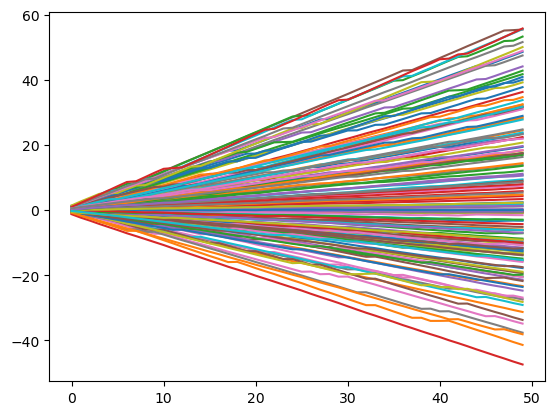

In [20]:
import matplotlib.pyplot as plt

plt.plot(prices.T)

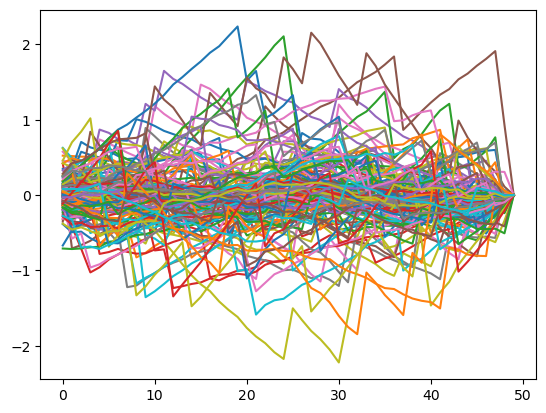

In [21]:
plt.plot(prices_norm.T)

In [22]:
dataset.T[::2].shape

(140, 255)

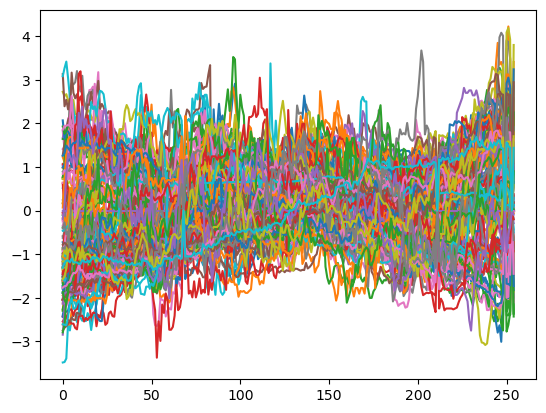

In [23]:
plt.plot(dataset.T[::2].T)

In [28]:
#Retrain on the whole dataset

train_loss = []

iter_train = Iter(train)
train_seq = torch.zeros(280).unsqueeze(0)

for x, y in iter_train:
    optimizer.zero_grad()

    inp = torch.tensor(x, dtype=torch.float).unsqueeze(0)
    train_seq = torch.cat((train_seq, inp), dim=0)

    y_hat = model(train_seq, src_mask(280)).squeeze().to(torch.float32)
    y = torch.tensor(y).to(torch.float32)

    pred = y_hat[0]
    loss = loss_function(pred[::2], y[::2])

    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())


print("Train loss: ", sum(train_loss) / len(train_loss))

Train loss:  0.26629366972080365


In [29]:
y_hat[0][::2].shape

torch.Size([140])

In [30]:
from operator import itemgetter

valuations = list(y_hat[0][::2])
recomendations = sorted(list(zip(TICKERS, valuations)), key=itemgetter(1), reverse=True)


recomendations

[('DNP', tensor(1.4581, grad_fn=<UnbindBackward0>)),
 ('PCF', tensor(1.4088, grad_fn=<UnbindBackward0>)),
 ('VGO', tensor(1.3532, grad_fn=<UnbindBackward0>)),
 ('CDR', tensor(1.2629, grad_fn=<UnbindBackward0>)),
 ('MCI', tensor(1.2253, grad_fn=<UnbindBackward0>)),
 ('PKP', tensor(1.1432, grad_fn=<UnbindBackward0>)),
 ('BRS', tensor(1.1424, grad_fn=<UnbindBackward0>)),
 ('APT', tensor(1.0774, grad_fn=<UnbindBackward0>)),
 ('11B', tensor(1.0535, grad_fn=<UnbindBackward0>)),
 ('MOC', tensor(1.0090, grad_fn=<UnbindBackward0>)),
 ('EUR', tensor(0.9929, grad_fn=<UnbindBackward0>)),
 ('GRN', tensor(0.9816, grad_fn=<UnbindBackward0>)),
 ('SNX', tensor(0.9504, grad_fn=<UnbindBackward0>)),
 ('ENT', tensor(0.9456, grad_fn=<UnbindBackward0>)),
 ('ECH', tensor(0.9248, grad_fn=<UnbindBackward0>)),
 ('PEN', tensor(0.8776, grad_fn=<UnbindBackward0>)),
 ('NEU', tensor(0.8245, grad_fn=<UnbindBackward0>)),
 ('STP', tensor(0.8119, grad_fn=<UnbindBackward0>)),
 ('SNT', tensor(0.7935, grad_fn=<UnbindBackwar